# Effective data visualization

In this notebook we cover data visualization methods data scientists use to explore data sets, with a focus on how to visualize multidimensional data. Data scientists spend a lot of time working on understanding relationships between variables in the data, and visualization is a key skill for these tasks. 

Inherently, computer displayed graphics are two-dimensional. Yet, we often wish to display multiple dimensions of a data set to better understand the relationships between the variables. In this lesson we will explore some of the visualization techniques which can be applied to these problems.

### About the data set

This data set is from the [Canadian Open Government website](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/87fc1b5e-fafc-4d44-ac52-66656fc2a245#additional-info)  and the [Canadian Association of Road Safety Professionals](https://www.carsp.ca/research/resources/canadian-vehicle-specifications/).

##### Columns
- **make** - vehicle make
- **short_model_name** - short model name
- **overall_length_cm, overall_width_cm , overall_height_cm, wheelbase_cm** - dimensions of vehicle in cm
- **curb_weight_kg** - weight of vehicle
- **weight_distribution_pct_front** -percent of the vehicle weight supported by the front axle
- **vehicle_class** - type of vehicle
- **engine_size_l** - engine size in liters
- **cylinders** number of engine cylinders
- **transmission** - manual or various types of automatic transmission
- **fuel** - regular gas, premium_gas or diesel
- **fuel_consumption_mpg** - miles per gallon of fuel for combined ratings (55% city, 45% hwy)
- **smog** - tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)
- **full_model_name** - full vehicle description

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize': (10, 8)})

Let's clean up the data first.

In [3]:
def read_auto_data(file = "../../data/canadian_cars_2022.csv"):
    'Function to load the auto data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    df = pd.read_csv(file)
    
    ## Split the number of gears from the type of transmission, decode fuel
    df['gears'] = df['transmission'].str.extract(r'([0-9]+)').astype('Int64')
    df['gears'] = df['gears'].fillna(1) # "gearless" continuously_variable vehicles
    df['fuel']=df['fuel'].replace({'X': 'regular_gas', 
                             'Z': 'premium_gas', 
                             'D': 'diesel'})
    df['transmission'] = df['transmission'].str.extract(r'([A-Z]+)')
    df['transmission'] =   df['transmission'].replace({'A': 'automatic', 
                             'AM': 'automated_manual', 
                             'AS': 'automatic_select_shift', 
                             'AV': 'continuously_variable', 
                             'M': 'manual'})
    
    ## Remove rows with missing values
    df = df.dropna(axis = 0).reset_index(drop= True)
    return df


auto_df = read_auto_data()
auto_df.head()

,make,short_model_name,overall_length_cm,overall_width_cm,overall_height_cm,wheelbase_cm,curb_weight_kg,weight_distribution_pct_front,vehicle_class,engine_size_l,cylinders,transmission,fuel,fuel_consumption_mpg,smog,full_model_name,gears
0,acura,ilx,462.0,180.0,141.0,267.0,1415.0,60.0,Compact,2.4,4,automated_manual,premium_gas,33,3,ILX 4DR SEDAN,8
1,acura,mdx,504.0,200.0,170.0,289.0,2044.0,60.0,SUV: Small,3.5,6,automatic_select_shift,premium_gas,25,5,MDX 4DR SUV AWD,10
2,acura,rdx,474.0,190.0,167.0,275.0,1830.0,57.0,SUV: Small,2.0,4,automatic_select_shift,premium_gas,29,6,RDX 4DR SUV,10
3,acura,tlx,494.0,191.0,143.0,287.0,1781.0,57.0,Compact,2.0,4,automatic_select_shift,premium_gas,29,7,TLX 4DR SEDAN AWD,10
4,alfa romeo,stelvio,469.0,190.0,165.0,282.0,1660.0,52.0,SUV: Small,2.0,4,automatic,premium_gas,30,3,STELVIO BASE/Ti,8


Now that you have loaded and had a first look at the data, it's time to get to work making some charts.

### Basic chart types

There are enumerable chart types that are used for data exploration. When exploring a data set you need to examine multiple views. This process will require using multiple chart types. 

All computer data graphics are projected onto a 2-dimensional surface.  This is a fundamental restriction on data visualization we must learn to work with. Very broadly, plots are one-dimensional (univariate) or 2-dimensional (bi-variate). We will study plots of both types in this lesson.   

- **kernel density plots** - 1d +
- **violin plots** -1d +
- **scatter plots** - 2d
- **2d kernel density plots** -2d
- **hexbin plots** - 2d

The following exercises give you some practice using these chart types.

### Kernel density estimation plots

You have used two methods for visualizing distributions. Now, you will look at another method, kernel density estimation. Kernel density estimation uses a moving window density estimation kernel to average the density of the distribution. The result is a smoothed estimate of the probability density of the variable.

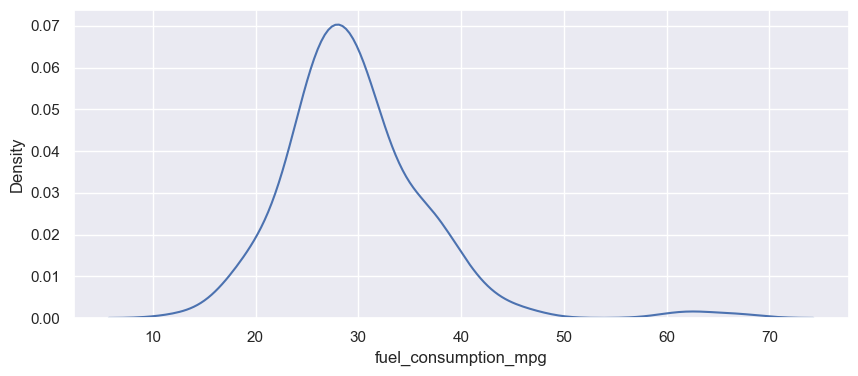

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
sns.kdeplot(auto_df['fuel_consumption_mpg'], ax = ax);

Examine this plot. Notice that the distribution is heavily skewed to the low side with a long right tail. This is called a right-skewed distribution. This finding is consistent with the other displays you have created with histograms and box plots.

A **left-skewed distribution** has a long left tail. Left-skewed distributions are also called *negatively-skewed* distributions. That is due to a long tail in the negative (or low) direction on the number line. The mean is left of the peak. Typically the mean is left of the median.

A **right-skewed distribution** has a long right tail. Left-skewed distributions are also called *positively-skewed* distributions. That is due to a long tail in the positive (or high) direction on the number line. The mean is right of the peak. Typically the mean is right of the median.

The KDE can also be superimposed on top of the histogram, since the two capture very similar information (albeit using different methods).

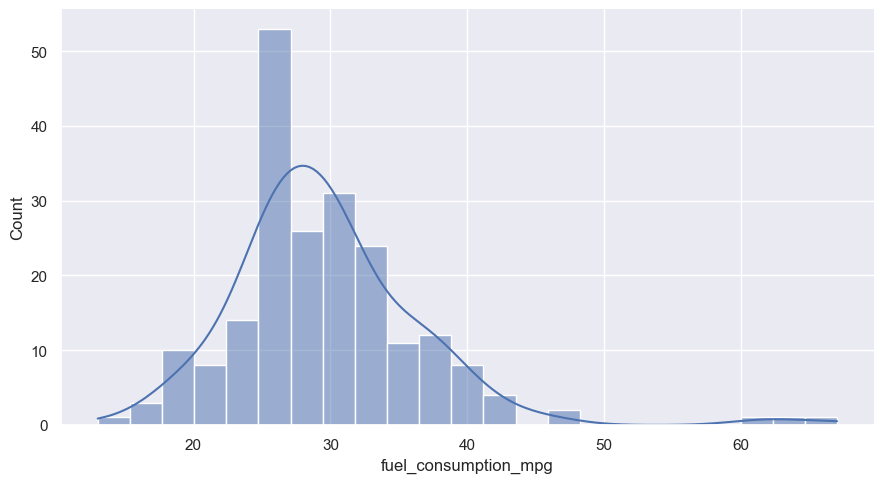

In [7]:
sns.displot(auto_df['fuel_consumption_mpg'], 
            kde = True, 
            aspect = 1.8);

### Violin plots

Violin plots are a useful, and relatively new, plot type. The violin plot combines some attributes of a kernel density plot and the box plot. The violin plot shows a pair of symmetric kernel density plots. The violin plot has the advantage, and perhaps disadvantage, of showing more. Like a box plot, the violin plot can be conditioned on a categorical (factor) variable, so distributions of a grouped variable can be compared.

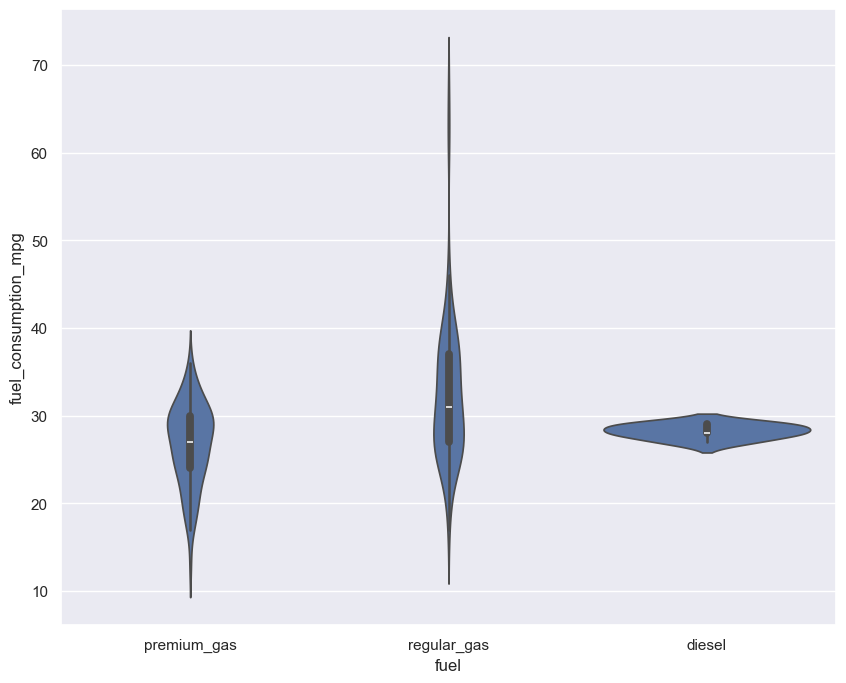

In [8]:
sns.violinplot(x = 'fuel', y = 'fuel_consumption_mpg', data = auto_df);

Examine this plot and  notice the following:
1. Fuel efficiencies are far more similar among diesel cars than for gas powered cars. 
2. The fuel type for highly fuel efficient cars is clearly visible.
3. The median (white dot), inner quartiles (black box), and whiskers at +/-1.5 of the IQR are all visible inside the violin. 

### Exercise

You have a hypothesis that the number of cylinders may also play a role in fuel efficiency. To simplify matters, we can group the vehicles with 4 and fewer cylinder and those having five or more:

In [10]:
# we can use .copy() to avoid SettingWithCopyWarning errors
auto_df['many_cylinders'] = auto_df['cylinders'].copy() > 4
auto_df['many_cylinders'].value_counts()

many_cylinders
False    133
True      77
Name: count, dtype: int64

In [12]:
auto_df.columns

Index(['make', 'short_model_name', 'overall_length_cm', 'overall_width_cm',
       'overall_height_cm', 'wheelbase_cm', 'curb_weight_kg',
       'weight_distribution_pct_front', 'vehicle_class', 'engine_size_l',
       'cylinders', 'transmission', 'fuel', 'fuel_consumption_mpg', 'smog',
       'full_model_name', 'gears', 'many_cylinders'],
      dtype='object')

In the cell below create and execute the code to display a violin of auto mpg grouped by `fuel` and `many_cylinders`. Seaborn allows you to group by the `x` variable and split the group using a binary categorical column using `hue` (color). In this case, use the arguments `x = 'fuel'` and `hue = 'many_cylinders'`. You should also try the alternative display option, `split = True`, which shows split violin plots.  

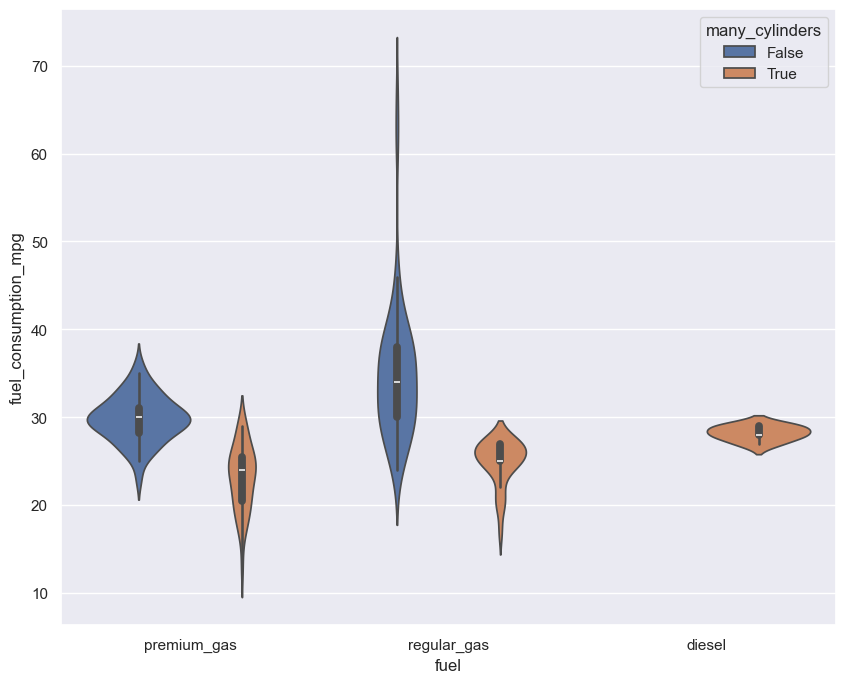

In [17]:
sns.violinplot(data=auto_df,x='fuel',y='fuel_consumption_mpg',hue='many_cylinders');

- Does cylinder count help explain the small range of fuel efficiencies in diesel vehicles?
- Are cars with many cylinder engines generally more fuel efficient?

### End of exercise

## Scatter plots

A basic scatter plot shows the relationship between two variables. Points are plotted at the x-y coordinates of each value pair.

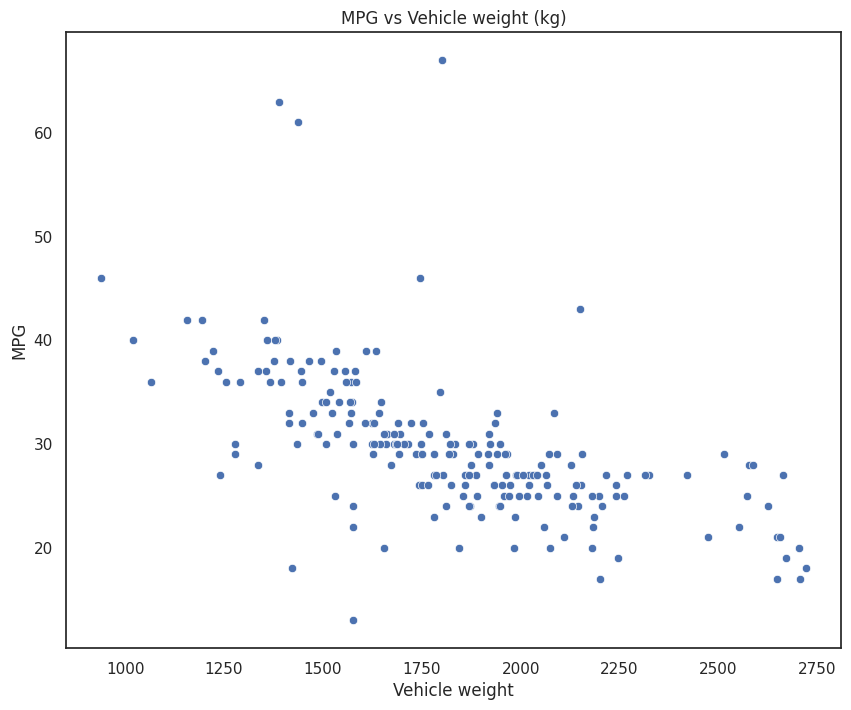

In [34]:
# ax = sns.scatterplot(x = auto_df['curb_weight_kg'], y = auto_df['fuel_consumption_mpg']) # this works too
ax = sns.scatterplot(x = 'curb_weight_kg', 
                     y = 'fuel_consumption_mpg', 
                     data = auto_df)
ax.set_title('MPG vs Vehicle weight (kg)')
ax.set_xlabel('Vehicle weight')
ax.set_ylabel('MPG');

The scatter plot shows the relationship between vehicle weight and fuel efficiency. The relationship has a clear trend, but there are several outliers that will require extra explanations. 

There is also a problem with **over plotting** on this display. Over plotting results when multiple data cases have the same, or nearly the same, values. Plotted points overlap, or lie one on top of the other, so that it is impossible to tell how many points are in some areas of the plot.    

### Exercise

1. Group the vehicles by `vehicle_class` in the above scatter plot using the hue parameter to see if you notice any trends.
    - How does the number of colors in a plot affect interpretability?
    - Group the vehicles by `vehicle_class` using both hue and style. How does having both a unique style and hue add to the interpretability of the plot?
    - If the legend is obscuring the plot try adding `ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))`

In [35]:
## your code goes here


2. Replace `scatterplot` with `jointplot`. What additional information is now displayed?

In [36]:
## your code goes here


3. Use the `hue` argument for `scatterplot` to color-code the points by `transmission`. How does a low cardinality column, i.e. one with fewer unique categories, like `transmission` compare with a higher cardinality one like `vehicle_class` in interpretability? What trends in transmission type do you notice?

In [37]:
## your code goes here


4. In the above plot, if the colors are too mixed up due to over plotting, it may be easier to break up the scatter plot into several, one for each value of `transmission`. Replace `scatterplot` with `relplot` and the `hue` argument with the `col` argument. Which plot is better in your opinion?

In [38]:
## your code goes here


5. One approach to deal with overplotting is to sample the data. Create the same scatter plot but using only 50% of the data. HINT: You can sample a `DataFrame` using the `sample` method.

In [39]:
## your code goes here


6. Notice how some values in `fuel_consumption_mpg` are very common, which result in the scatter plot having horizontal stripes. Foretunately, there's probably enough weight variation that we can still see the individual points, but sometimes that's not the case. Produce a scatter plot of `gears` on the x axis and `curb_weight_kg` on the y axis. After examining the plot, replace `scatterplot` with `stripplot` and examine the plot again. What changed?

In [40]:
## your code goes here



7. Returning to the original scatter plot, add a trend line by replacing `scatterplot` with `regplot`. Examine the documentation using shift-tab or the [Seaborn website](https://seaborn.pydata.org/generated/seaborn.regplot.html) to understand how the trend line and confidence interval shading are being determined.

In [41]:
## your code goes here


### End of exercise

## Mixing aesthetics

As we saw, we can use plot aesthetics to view additional dimensions of the data set. Specific aesthetics are used to project additional dimensions onto a two dimensional plot surface. Additionally, careful choice of plot aesthetics can highlight certain aspects of a data set you wish to present.   

There are many possible aesthetics one can use for visualization. Specific examples of aesthetics you will work with and the data types they are useful for are shown in the table below:

| Property or Aesthetic |Perception| Data Types |
|:---------|:-----------|:------------|
|Aspect ratio | Good | Numeric |
|Regression lines | Good | Numeric plus categorical |
|Marker position | Good | Numeric |
|Bar length | Good | Counts, numeric |
|Sequential color palette | Moderate | Numeric, ordered categorical |
|Marker size | Moderate | Numeric, ordered categorical |
|Line types | Limited | Categorical |
|Qualitative color palette | Limited | Categorical|
| Marker shape | Limited | Categorical |
| Area | Limited | Numeric or categorical |
| Angle | Limited | Numeric |

Using the above aesthetics, we're able to project five dimensions of data onto a 2D scatter plot, which can lead to interesting insights about the data.

**Warning!** Don't over do it! Too many colors and shapes can be confusing, obfuscating rather than enlightening. Limit the number of categories you try to show with these aesthetics.

### Dealing with overplotting: using transparency

As already mentioned, **overplotting** is a significant problem with scatter plots. In this case, we are working with only 210 cases, and yet we see some overplotting. With a large data set, overplotting makes the plot appear blob-like, and rendering such a plot can also be very time consuming.

Transparency is a useful aesthetic to overcome minor over plotting. Transparency is defined on a scale from 0 (completely transparent, or invisible) to 1 (perfectly opaque). By choosing reasonable transparency values, you can get a feel for how many points are clustered in a small area of a plot. 

The code in the cell below uses `alpha = 0.5` to adjust the transparency of individual points. This makes each point 50% transparent.

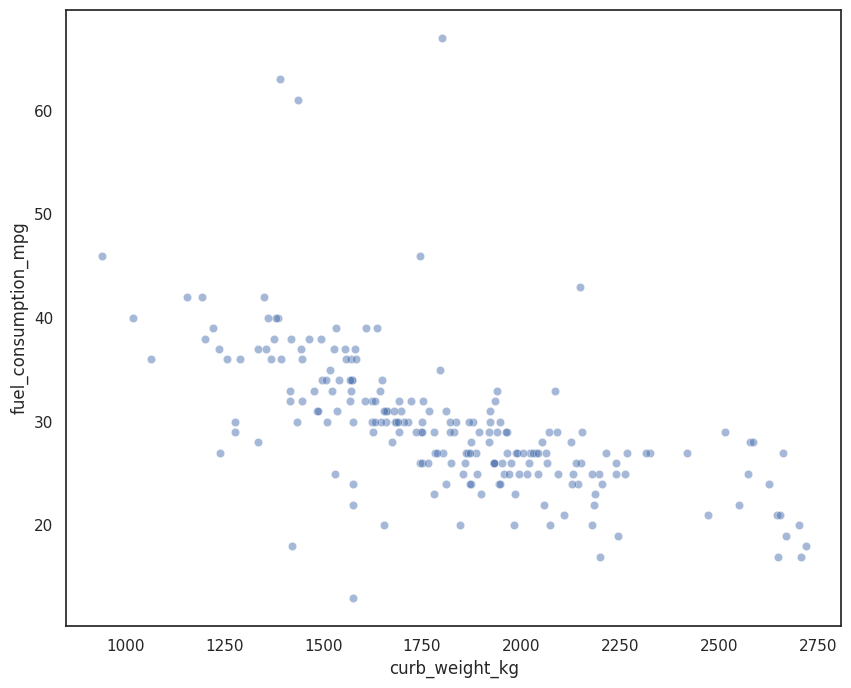

In [42]:
ax = sns.scatterplot(x = 'curb_weight_kg', 
                     y = 'fuel_consumption_mpg', 
                     alpha = 0.5,
                     data = auto_df)

In the plot above, you can now see where points are over plotted. As points lie one over another, you can see the darker color of the points. 

### Dealing with overplotting: 2D kernel density plot

A 2 dimensional kernel density plot works much like the 1 dimensional version we have already explored. This plot shows density of points rather than the individual points. In this way, a plot can be created with a very large number of points. 

In this case we will overlay the points on the kernel density plots. The code in the cell below, uses the `kdeplot` to compute and display a 2-d kernel density plot using a color scale. An axis is defined by the KDE plot and then used to add the scatter plot and plot attributes. Try commenting out parameters like shade and alpha to understand how they impact the aesthetic of the plot.

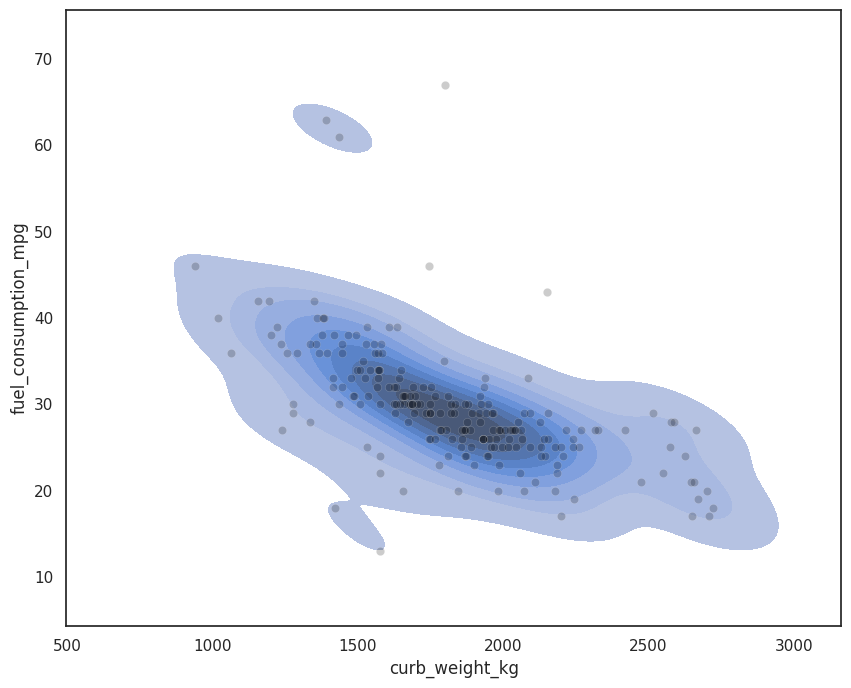

In [44]:
ax = sns.kdeplot(x = 'curb_weight_kg', 
                 y = 'fuel_consumption_mpg', 
                 fill = True,
                 data = auto_df)
ax = sns.scatterplot(x = 'curb_weight_kg', 
                     y = 'fuel_consumption_mpg', 
                     alpha = 0.2,
                     color = 'black',
                     data = auto_df)

The 2D kernel density plot highlights the fact that the relationship between city MPG and weight has multiple clusters of concentration. There is considerable overplotting in these regions. The points for the groups of outliers are even more prominent than before. 

### Dealing with overplotting: Hexbin plot

The 2-d KDE plot gives a good overall view of point density, but sharp transitions tend to be obscured. A hexbin plot provides more granular detail. Even bins with a single point are displayed, which may not be the case with a 2-d KDE plot. However, a hexbin plot can have a 'choppy' appearance. Both hexbin and 2-d KDE plots can display very high point densities. 

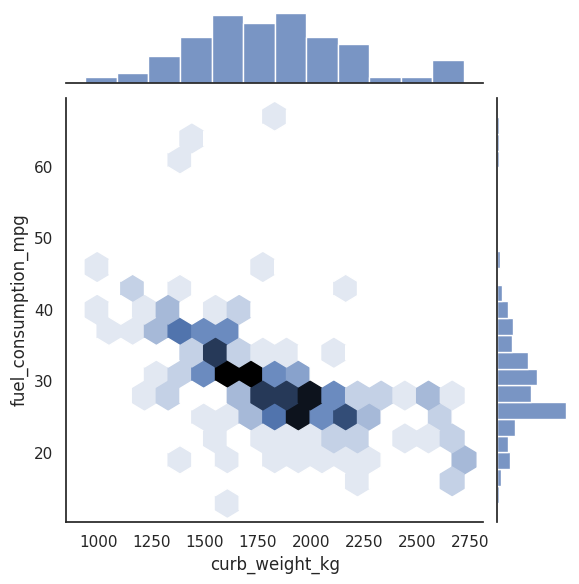

In [45]:
sns.set_style("white")

sns.jointplot(x = 'curb_weight_kg', 
              y = 'fuel_consumption_mpg', 
              kind = 'hex',
              joint_kws= {'gridsize': 16},
              data = auto_df)

Examine this plot, noticing the following:

- The cluster of vehicles around 1600 kg and 30 mpg is visible in a way that was invisible without the hex bins - but that might also be an artifact of the bin size and offset. Try adjusting the `gridsize` parameter to see how big a difference the number of bins makes.
- The high and low mileage outliers are still visible, which was not always true for the kde plot. 

## Heat maps

A heat map or raster plot allows you to visualize data which is naturally arranged on a regular grid or lattice. The heat map uses colors to show the values, or heat, on the grid. Data arranged on a lattice is fairly common in many areas including, spatial analysis, image analysis, and correlation analysis. 

In this example we create a heatmap of frequency of autos in mileage ranges by the manufacturer. There are a number of preprocessing steps we must perform to create an array that can be displayed.

In [46]:
num_bins = 20
auto_df['mpg_bin'] = pd.cut(auto_df['fuel_consumption_mpg'], bins = num_bins, labels = range(num_bins))
auto_df[['fuel_consumption_mpg', 'mpg_bin']].head()

,fuel_consumption_mpg,mpg_bin
0,33,7
1,25,4
2,29,5
3,29,5
4,30,6


You can see that the mileage of the cars are now in numbered bins. 

Next, we need to create an array of auto mpg bins by make. This is done by the following steps:

1. The `crosstab` method is used to create an array of the count of mpg bins by manufacturer. 
2. The number of cars by manufacturer needs to be normalized so it is in a range $\{ 0, 1 \}$. If we did not normalize, manufacturers with larger numbers of models would dominate the heatmap.
  
Execute this code and examine the tail of the normalized data frame. Can you notice any problem with the index?

In [47]:
make_mpg = pd.crosstab(auto_df['mpg_bin'], 
                         auto_df['make'], 
                         normalize = 'columns')
make_mpg.tail()

make,acura,alfa romeo,aston martin,audi,bentley,bmw,buick,cadillac,chevrolet,chrysler,...,mazda,mercedes-benz,mitsubishi,nissan,porsche,rolls-royce,subaru,toyota,volkswagen,volvo
mpg_bin,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.076923,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.076923,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.076923,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Whenever you create bins, it is a good idea to double-check that all possible bins are in your data:

In [48]:
missing_idx = [i for i in range(num_bins) if i not in make_mpg.index]
missing_idx

[13, 14, 15, 16]

As you can see in this example, some bins are missing. This is a problem, as plots will be misleading: plots would make the data appear to cover the complete spectrum, while in fact there are holes!

A simple solution is to add the missing bins manually. (Better solution would be to prepare the result structure and pre-set everything with (in this case) zeros. The binning then replaces the data where it's available.

In [49]:
# create a dataframe of zeros with all the missing indexes
missing = pd.DataFrame(np.zeros([len(missing_idx), len(make_mpg.columns)]),
                        index = missing_idx,
                        columns = make_mpg.columns)

# join missing columns with the rest of the data and sort the index
make_mpg = pd.concat([make_mpg, missing], axis = 0).sort_index()
make_mpg.tail()

make,acura,alfa romeo,aston martin,audi,bentley,bmw,buick,cadillac,chevrolet,chrysler,...,mazda,mercedes-benz,mitsubishi,nissan,porsche,rolls-royce,subaru,toyota,volkswagen,volvo
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Notice that all of the values are in the range $\{ 0, 1 \}$. And now all bins are set!

Finally, we are ready to make the heat map plot! The code in the cell below follows the recipe we have used for other plot types.  Execute this code and examine the results. 

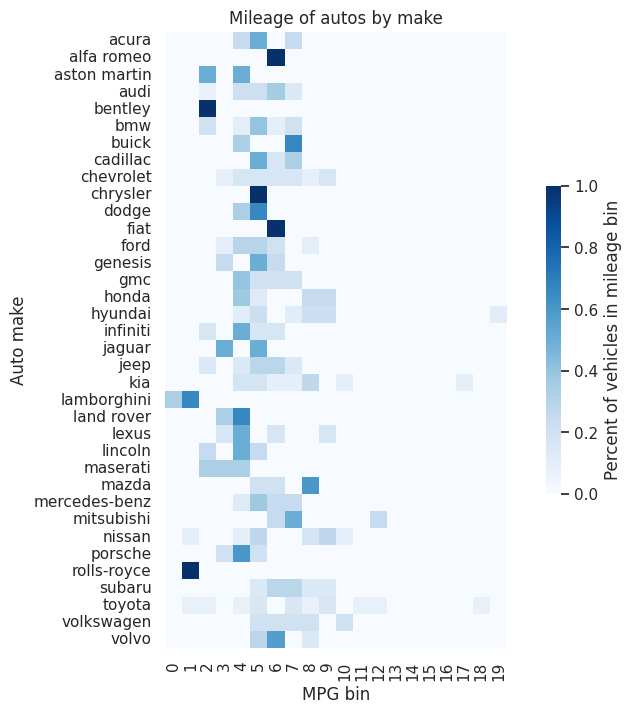

In [50]:
ax = sns.heatmap(make_mpg.transpose(), # make on y axis more legible
                 cmap = 'Blues',
                 square = True, 
                 cbar_kws = {'shrink': 0.5, 
                             'label': 'Percent of vehicles in mileage bin'})

ax.set_xlabel('MPG bin')
ax.set_ylabel('Auto make')
ax.set_title('Mileage of autos by make')
plt.yticks(rotation=0);


Examine this heat map. In this case, the values in the array are quite sparse. The many zeros are shown in the lightest shade of blue. In many applications the heat map will not have such a large fraction of zeros. 

The darker the shade of blue, but larger the fraction of auto models a manufacturer has in a mpg bin. Some examples of interpretation are:

1. Luxury cars like Rolls-Royce and Bentleys tend to have low mileage. 
1. The highest mileage vehicles are made by Japanese companies, and the gap between the high mileage vehicles and the rest is dramatic.
1. Toyota autos span the largest range of mpg.

It may be easier to see this if somehow we could re-arrange the heatmap so that similar cars are placed next to each other in the x-axis. There is a way to accomplish that using **hierarchical clustering**, which is an ML-related topic so we will not go into the weeds here, but let's see how it works in action:

In [51]:
import scipy.cluster.hierarchy as sch

pairwise_distances = sch.distance.pdist(make_mpg.transpose(), metric = 'euclidean')
linkage = sch.linkage(pairwise_distances, method = 'average')
dist_threshold = pairwise_distances.mean()
idx_to_cluster_array = sch.fcluster(linkage, dist_threshold, criterion = 'distance')
idx = np.argsort(idx_to_cluster_array)

The above snippet ends by providing us with a list of indices `idx` which we can use to rearrange the data so cars next to each other are more similar (in the vertical direction).

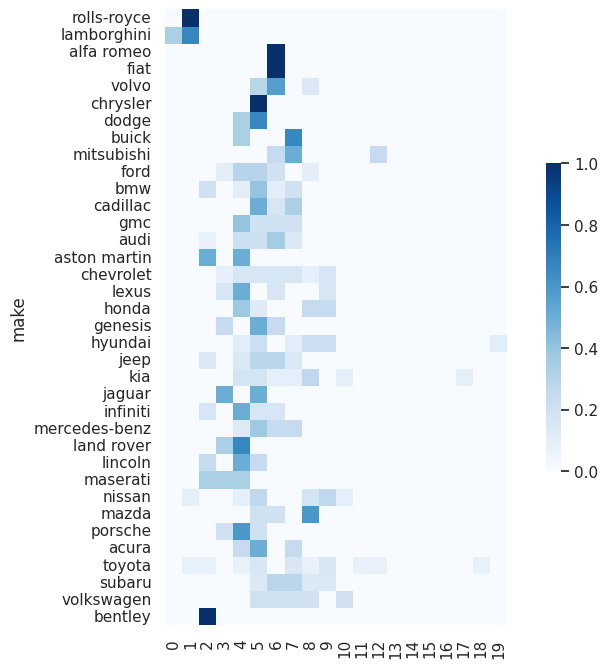

In [52]:
sns.heatmap(make_mpg.iloc[:, idx].transpose(), 
            vmax = 1.0, 
            cmap = 'Blues', 
            square = True, 
            cbar_kws = {'shrink': 0.5});

We can get the above plot even more easily by using `sns.clustermap`, which does a similar computation under the hood and as a bonus also shows us the **dendrogram** showing how the clustering is happening. Hierarchical clustering has a tree structure, so splits at the top are more important than splits at the bottom.

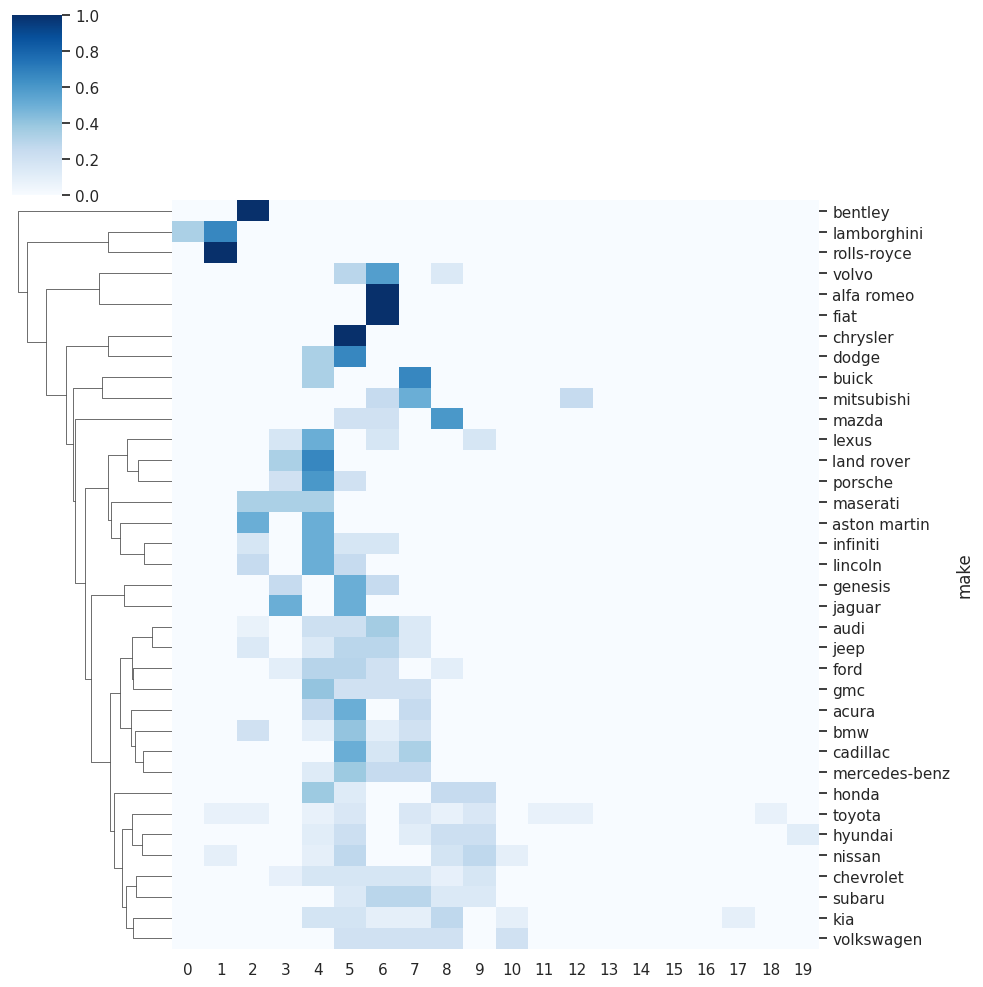

In [53]:
sns.clustermap(make_mpg.transpose(), 
               row_cluster = True, 
               col_cluster = False,
               yticklabels=True,
               cmap = 'Blues');

## Plots for higher dimensions

You have explored basic plot types and used aesthetics to project multiple dimensions onto basic plot types. We will now investigate multi-axis plots to project different views of a data set. We will now explore several multi-axis plots: 

- Correlation plots
- Pairwise scatter plots
- Faceted plots

### Correlation plots

With a large number of variables it can be quite difficult to understand the correlation matrix. There are a number of ways to display correlation relationships. In this lesson we will use a heatmap, which is especially effective when there are lots of features.

Let's look at a correlation matrix now and visualize it using a heatmap.

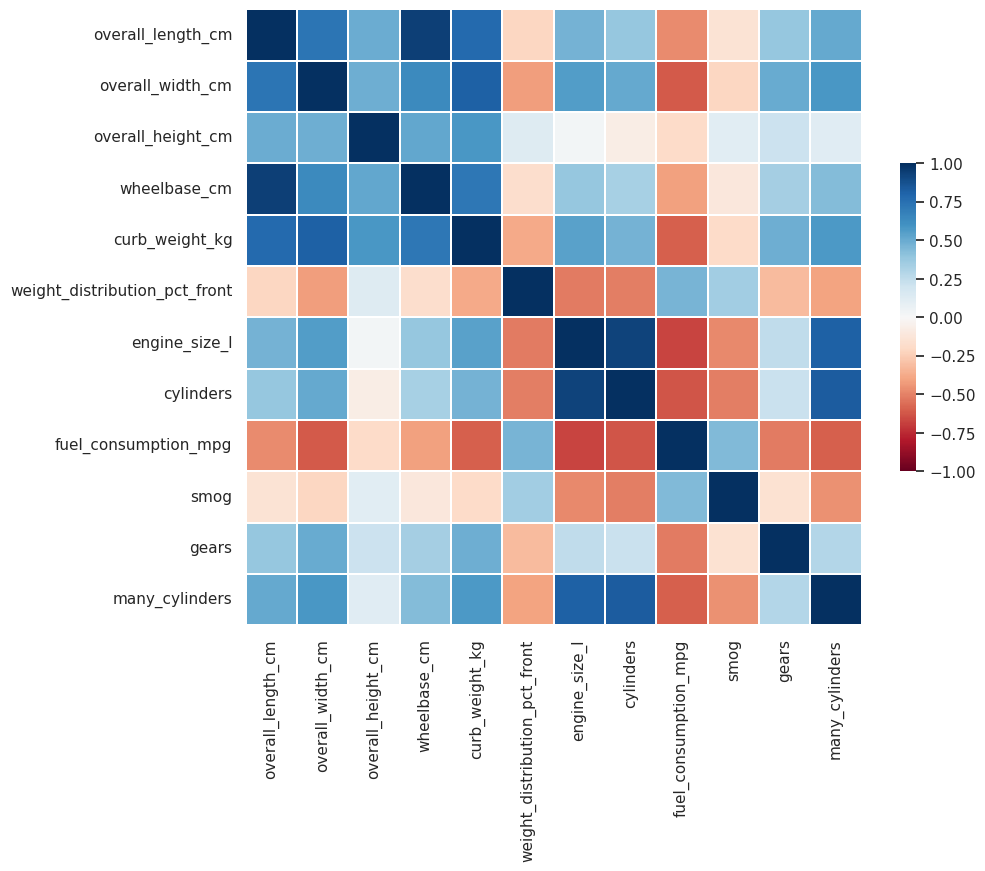

In [55]:
auto_corr = auto_df.corr(numeric_only=True)

ax = sns.heatmap(auto_corr, 
            vmin = -1.0,
            cmap = 'RdBu', 
            square = True, 
            linewidths = .25, 
            cbar_kws = {'shrink': 0.5});

Examine this plot. The darker the color the higher the correlation; positive and negative. 

Another option for displaying the correlation matrix is to color code only to the significant correlations.

<Axes: >

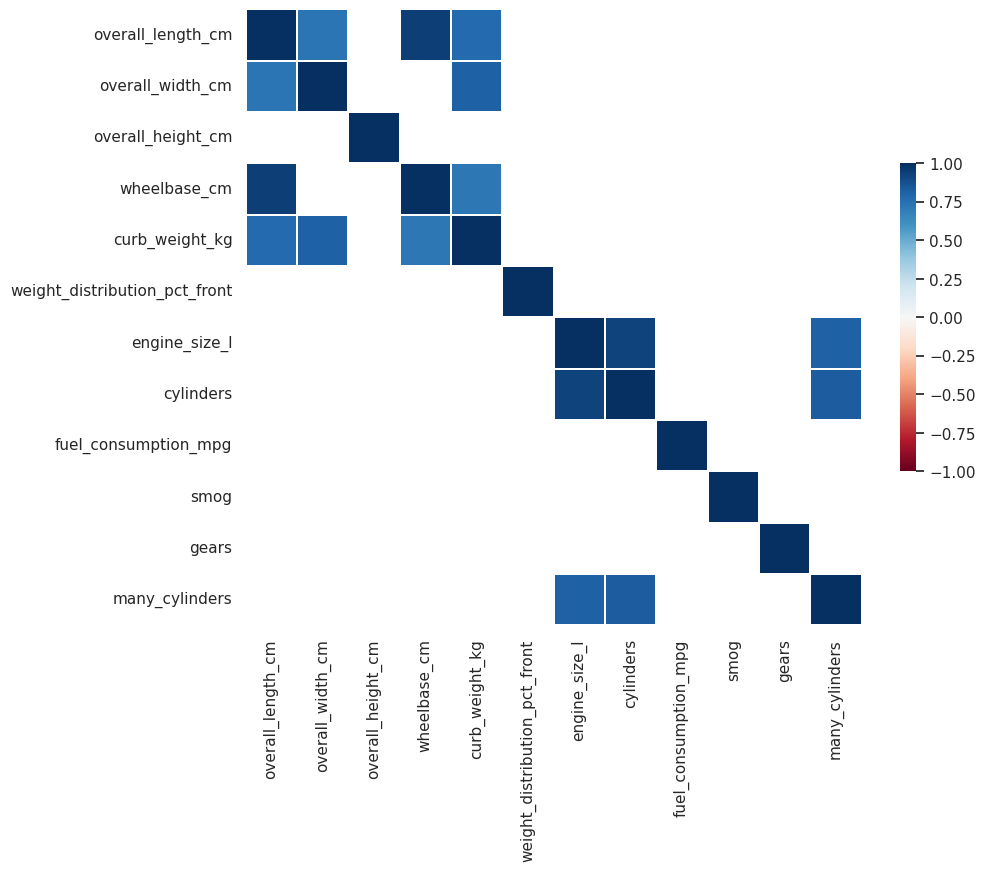

In [56]:
corr_threshold = 0.7
sns.heatmap(auto_corr[np.abs(auto_corr) >= corr_threshold], 
            vmin = -1.0,
            cmap = 'RdBu', 
            square = True, 
            linewidths = .25, 
            cbar_kws = {'shrink': 0.5})

And of course since the correlation matrix is a kind of heatmap, we can use `clustermap` to rearrange the variables so variables that are more correlated are next to each other. We can then use the dendrogram as a guide in drawing conclusions.

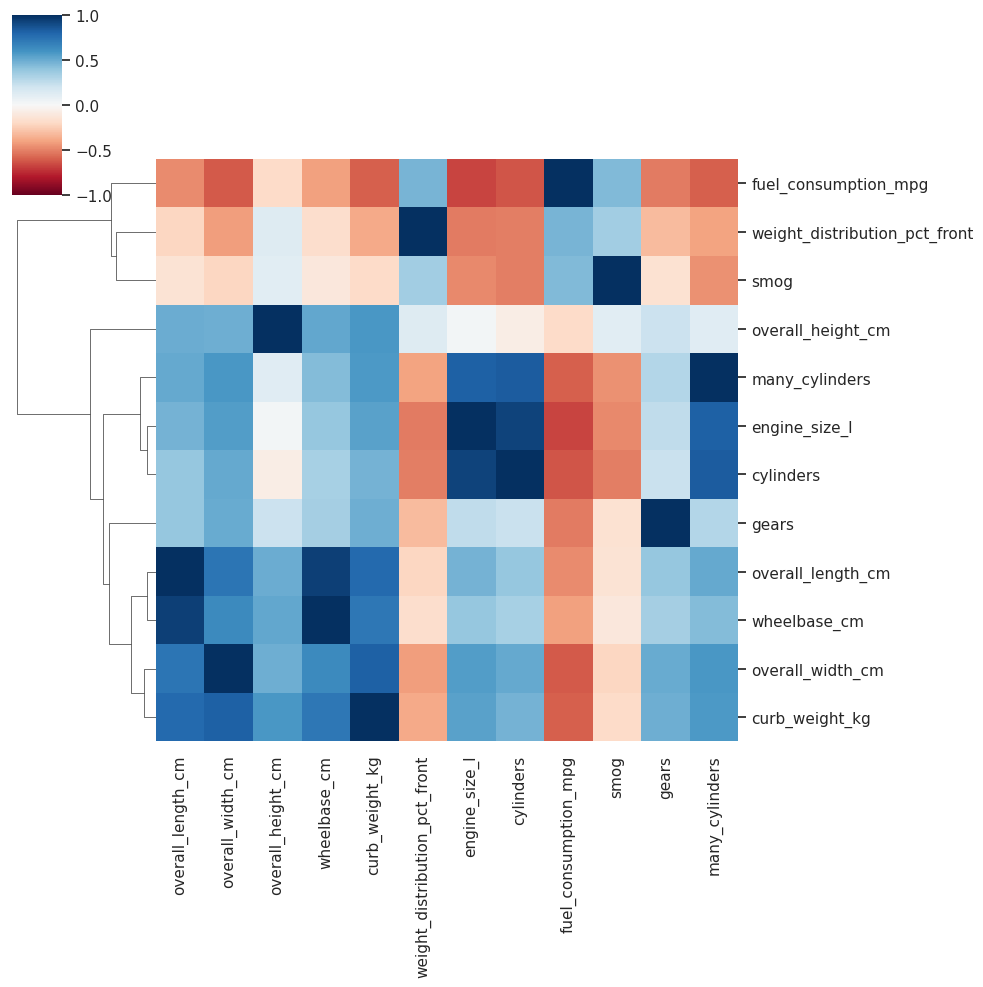

In [57]:
sns.clustermap(auto_corr, 
               col_cluster = False, 
               vmin = -1.0, 
               cmap = 'RdBu');

## Scatter plots matrix

Pairwise scatter plots, also known as scatter plot matrices, allow you to view multiple dimensions of a data set on one plot. A scatter plot is shown of each variable versus all other variables, arranged in an array. Another type of plot, such as a KDE plot, can be shown for each pair of variables on the diagonal. Optionally, regression lines can be added to each scatter plot. Also optionally, other plot types, such as 2-d KDE plots, can be used for the upper or lower diagonal.

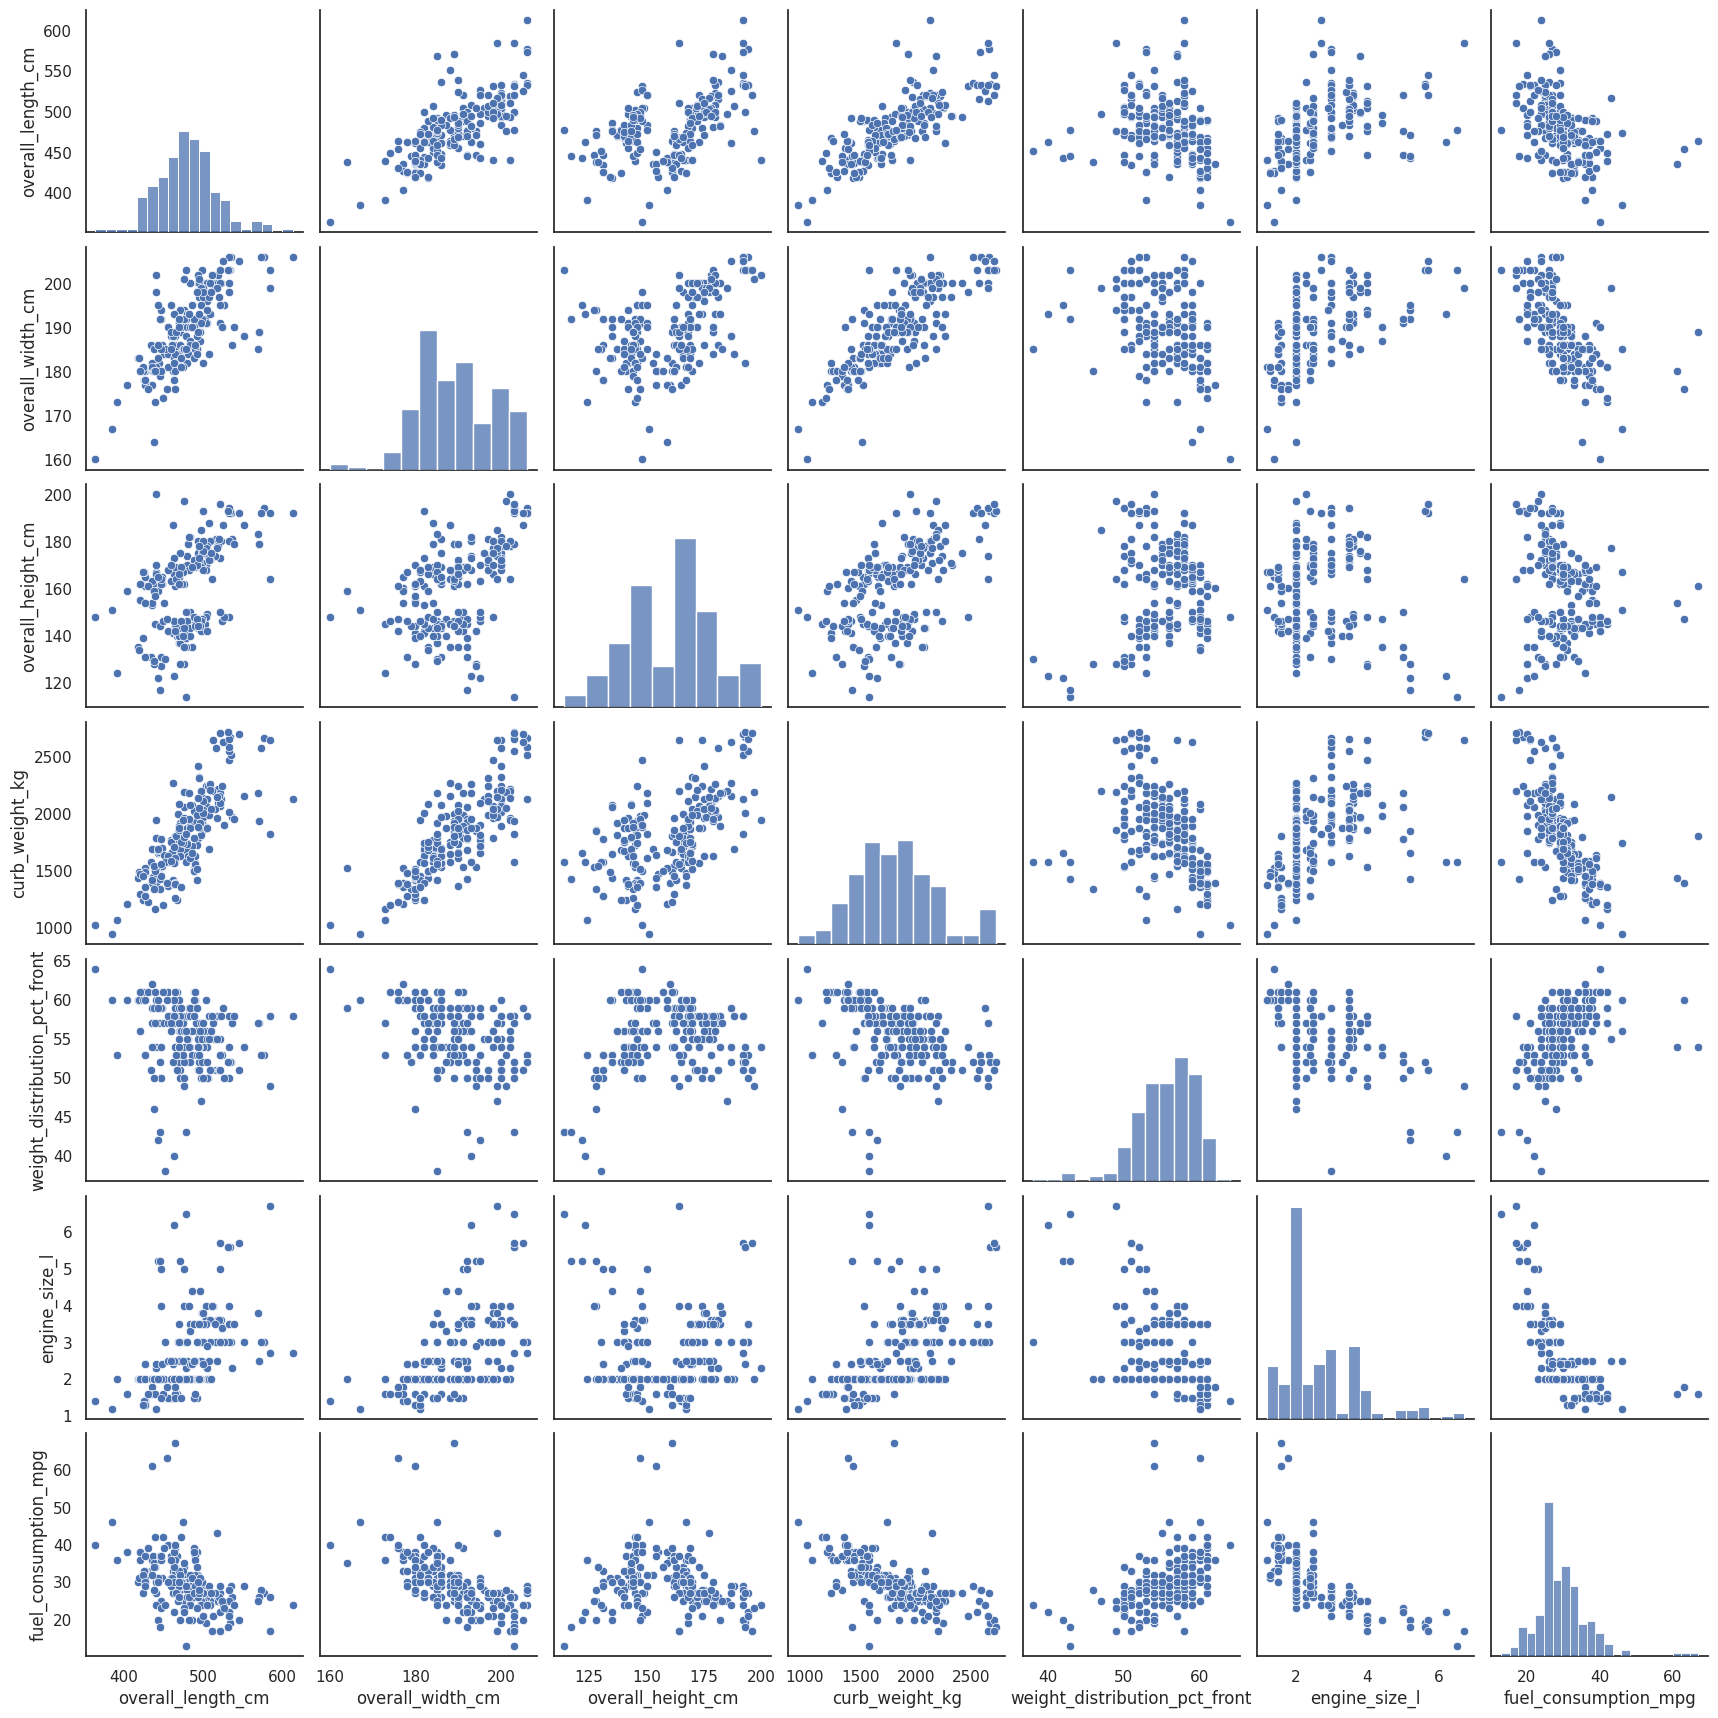

In [58]:
num_cols = ['overall_length_cm', 'overall_width_cm', 'overall_height_cm', 'curb_weight_kg',
       'weight_distribution_pct_front', 'engine_size_l', 'fuel_consumption_mpg']
sns.pairplot(auto_df[num_cols]);

As with a single pairplot or histogram, hue can be used to explore categorical columns in the pairplot. Because the plot is already so complex, a low cardinality column is ideal. We will create a "high smog" column, then explore what differences there are between low and high smog emitting vehicles (1 is the worst score for smog).

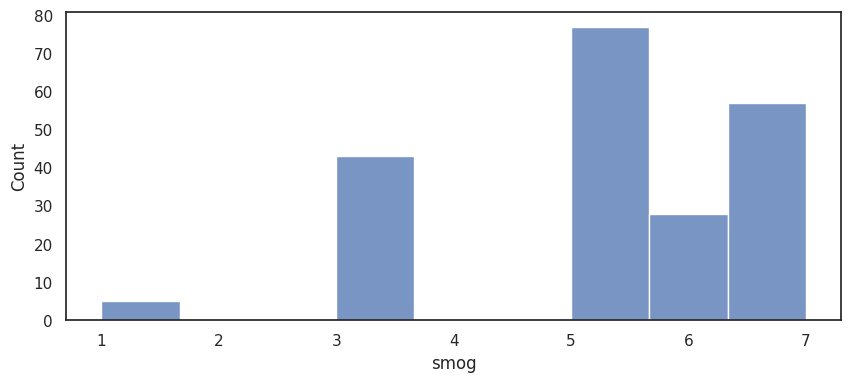

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
sns.histplot(auto_df['smog'], ax = ax);

In [60]:
auto_df['smog_level'] = np.where(auto_df['smog'] > 4, 'Low Smog', 'High Smog')
auto_df['smog_level'].value_counts()

smog_level
Low Smog     162
High Smog     48
Name: count, dtype: int64

 
The code in the cell below plots the scatter plot matrix for the selected variables of the data set. Some key aspects of this code includes:
1. The plot is created with the seaborn `pairplot` method.
2. The `hue` argument is used to display the fuel type.
3. The `diag_kind="kde"` argument places KDE plots along the diagonal.
4. The `map_upper` method places a different plot type on the upper diagonal, using the following arguments:
  - The plot type is specified as a seaborn `kdeplot`.
  - The color palette is set to `"Blues"`. 
  
Execute this code and examine the results.

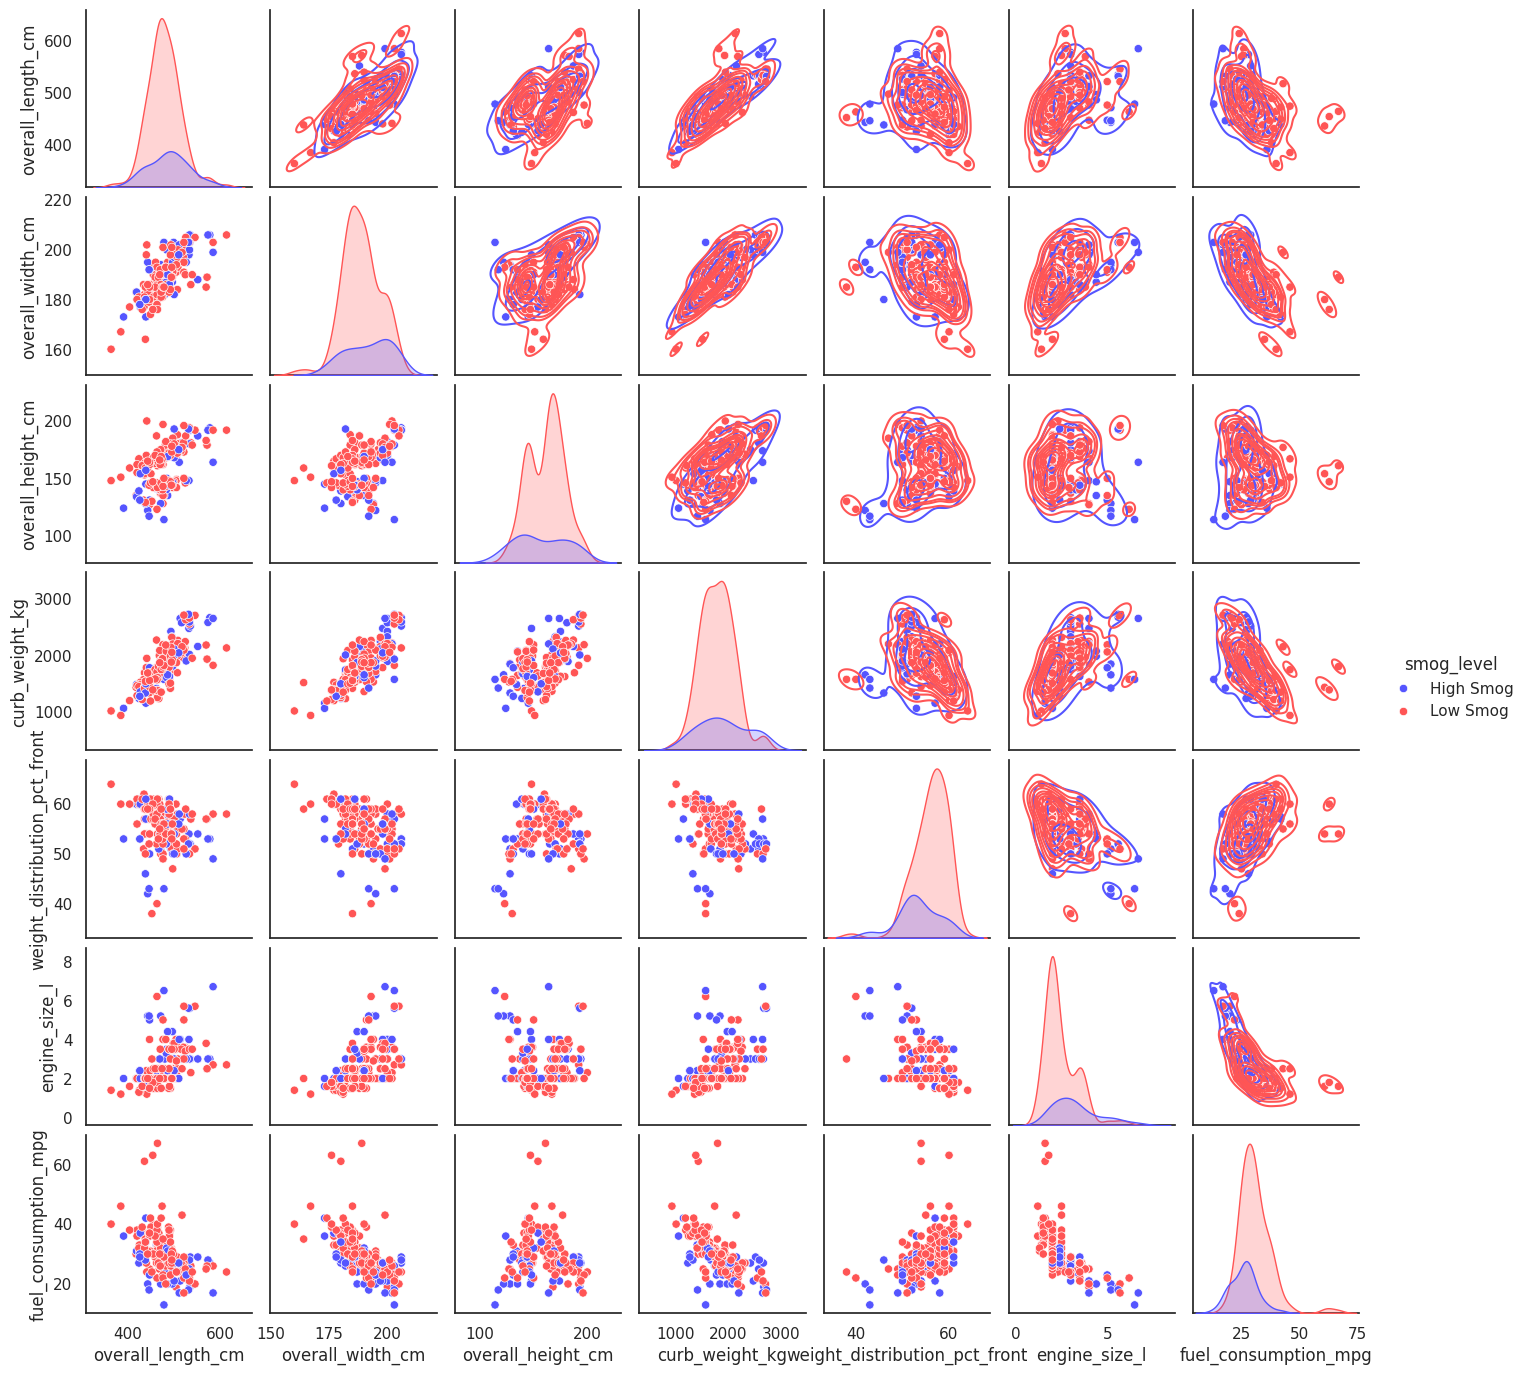

In [61]:
sns.pairplot(auto_df[num_cols + ['smog_level']], 
             hue = 'smog_level', 
             palette = 'seismic', 
             diag_kind = 'kde', 
             height = 2).map_upper(sns.kdeplot);

There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- The KDE plots of the variables generally show a variety of skews, some to the right like `engine_size`, others to the left like `weight_distribution_pct_front`. Most have a single modal vale, but some like `overall_height_cm` are closer to bimodal distributions.
- Several of the variables have a fairly linear relationship. For example, the relationships between length, width and weight.
- Other relationships are clearly nonliner. For example, the relationships between engine size and mpg, or height and mpg. 
- Other relationships are much less obvious, or nonexistant. For example, the relationship between front/rear weight distribution and the dimensions of the vehicle. 
- The d-2 KDE plots confirm there is no clear separation between low smog and high smog vehicles using this part of the data. 

There are a number of powerful charting packages available for the Python language. This situation can lead to confusion as to which package to use for which situation. Below is an outline to help you understand the organization of Python graphics choices:

- **`matplotlib`:** [Matplotlib](https://matplotlib.org/users/index.html) is a low-level scientific and technical charting package. A number of other Python charting libraries are built on top of Matplotlib. As a result, a bit of knowledge of Matplotlib will help you set the attributes of plots created with several other packages. An extensive [tutorial](https://matplotlib.org/tutorials/index.html) is available for Matplotlib.
- **`pandas`:** The [visualization methods for Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html) provides a simple interface for common plot types for data in data frames. As with many other Python plotting libraries Pandas visualization is built on top of Matplotlib. You can use common Matplotlib methods with Pandas visualization. 
- **`seaborn`:** The [Seaborn](https://seaborn.pydata.org/) package provides high-level api for statistical graphics. As with many other Python plotting libraries Seaborn is built on top of Matplotlib. You can use common Matplotlib methods with Seaborn.  A [tutorial](https://seaborn.pydata.org/tutorial.html) with useful examples is available for Seaborn.   
- **Other packages:** There are a number of other sophisticated and useful Python graphics packages. Unfortunately, we do not have time in this course to cover these packages. The Python [ggplot](http://ggplot.yhathq.com/) package provides a high-level graphics interface based on the grammar of graphics used in the R `ggplot2` package.  There are also powerful  interactive (based on Javascript) graphics packages which are widely used, such as [plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/).

# Assignment

In the lesson, we explored using plot asthetics to project additional dimensions onto the two dimensional plots, and used scatter plot matrices to examine the relationships between several variables. In this exercise we want to put that to practice in order to create good visualizations. 

Let's begin by loading the data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize': (10, 8)})

bank = pd.read_csv('../data/bank-full.csv', sep = ";")
bank.head()

In some cases, faceting can be done relatively easily using the `row` or `col` arguments if that option exists. For example, `catplot` has that option, so we can use it to create several bar plots.

- Using `catplot`, display a bar plot showing counts for each job, with bars color-coded by whether the customer is a homeowner or not. You need to ensure that your plot is well proportioned. <span style="color:red" float:right>[1 point]</span>

In [ ]:
## your code goes here

- Break up the above plot by the customer's marital status. In other words, display a separate bar plot for each category in `marital`. You can use either the `row` or `col` argument to do this. <span style="color:red" float:right>[2 point]</span>

In [ ]:
## your code goes here

- Use a visualization to show how homeowners and renters' balances compare, and whether this effect is different for married vs single customers. Note that balance is a highly skewed variable, so use the log of balance instead of balance itself (use the `np.log10` function). To simplify things, leave out the negative balances from the plot. Choose your visualization carefully and short summary of what your visualization shows. <span style="color:red" float:right>[3 point]</span>

In [ ]:
## your code goes here

Unfortunately not all visualization functions in `seaborn` have a `row` or `col` argument. When that's the case, we use `FacetGrid`, which acts as a wrapper for the visualization functions. Here's an example with `sns.boxplot`:

In [ ]:
g = sns.FacetGrid(data = bank, col = 'marital')
g = g.map(sns.boxplot, data = bank, x = 'balance', y = 'housing', order = ['no', 'yes'])

The above plot is not very good. It has the following flaws that you need to fix:

- The box plot is too squashed because the `balance` has a very skewed distribution. So use `log_balance` instead. However, let the tick mark labels on the x-axis still show values for `balance`, not `log_balance`. To do this, you will need to find out how to specify where to draw tick marks and how to specify your own labels for the tick marks. Your tick marks on the x-axis should show only the following balance amounts: 0, 10, 100, 1000, 10k, and 100k. Your tick marks on the y-axis should show `rent` and `own`. <span style="color:red" float:right>[3 point]</span>
- Having three plots side by side like this is not adding any benefit. We want the plot to make it easy to compare housing vs renting, and to compare across marital status. So stack the three plots vertically instead, and stretch out the plots in the horizontal direction to make use of the space. <span style="color:red" float:right>[2 point]</span>
- Color-code the box-plots so that homeowners and renters have different colors. Note that in this case, color is a redundant aesthetic, but it makes it easier to make comparisons. <span style="color:red" float:right>[1 point]</span>

In [ ]:
## your code goes here

In addition to `FacetGrid`, there is also `PairGrid` and `JointGrid` which can be used to create customized versions of `pairplot` and `jointplot` which we used earlier, but we leave that for you to investigate.

Generally, data visualization can feel like a lot of trial and error. This is normal, since it's hard to say if we have the right plot unless we look at it first. So feel free to try different plots, but be careful to not overdo it with aesthetics and focus on creating a plot that really makes the answer to the question stand out visually.

# End of assignment